In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Adding a global pooling layer to reduce feature dimensions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Assuming `base_model` is your loaded pretrained model without top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # This layer will average out the spatial dimensions
model = Model(inputs=base_model.input, outputs=x)

# Now `model` will output 2D features instead of 4D

# Prepare your data generators
data_gen = ImageDataGenerator(rescale=1./255)
generator = data_gen.flow_from_directory(
    '/Users/krishna/Semester2/GWAR/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for feature extraction: keeps data in order
)

# Extract features
features = model.predict(generator, steps=len(generator))

Found 6160 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step


In [2]:
labels = generator.classes


In [4]:
import numpy as np

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming 'features' are your extracted CNN features and 'labels' are the corresponding labels
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape features for RNN input (batch, timesteps, features per step)
# Here 'timesteps' could be 1 if you don't have sequence data
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2])))  # Adjust the number of LSTM units as needed
model.add(Dense(10, activation='relu'))  # The number of neurons in the dense layer; adjust based on your dataset
model.add(Dense(len(np.unique(labels)), activation='softmax'))  # Output layer; number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.7339 - val_accuracy: 0.9700 - val_loss: 0.1156
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0906 - val_accuracy: 0.9821 - val_loss: 0.0657
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9899 - loss: 0.0429 - val_accuracy: 0.9911 - val_loss: 0.0407
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0232 - val_accuracy: 0.9927 - val_loss: 0.0286
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0190 - val_accuracy: 0.9894 - val_loss: 0.0302
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0105 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0065 - val_accuracy: 0.9903 - val_loss: 0.0292
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0039 - val_accuracy: 0.9927 - val_

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7547 - loss: 0.7422 - val_accuracy: 0.9359 - val_loss: 0.2068
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9582 - loss: 0.1466 - val_accuracy: 0.9854 - val_loss: 0.0681
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9912 - loss: 0.0511 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9943 - loss: 0.0274 - val_accuracy: 0.9919 - val_loss: 0.0316
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9959 - loss: 0.0221 - val_accuracy: 0.9927 - val_loss: 0.0255
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9878 - val_loss: 0.0362
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0082 - val_accuracy: 0.9862 - val_loss: 0.0381
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9972 - loss: 0.0119 - val_accuracy: 0.9935 - val_

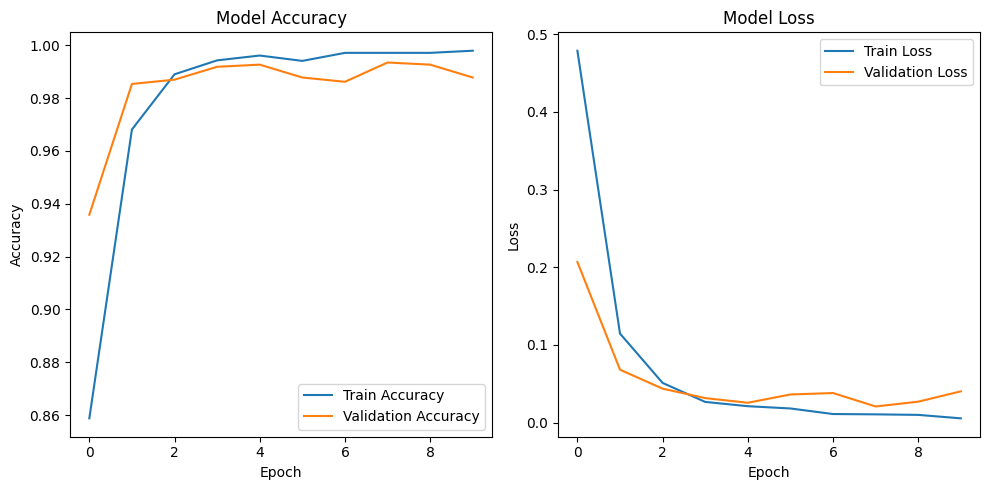

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'features' and 'labels' are defined
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape features for RNN input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(np.unique(labels)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluation metrics
accuracy = accuracy_score(Y_test, y_pred_classes)
precision = precision_score(Y_test, y_pred_classes, average='macro')
recall = recall_score(Y_test, y_pred_classes, average='macro')
f1 = f1_score(Y_test, y_pred_classes, average='macro')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Plotting training & validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8369 - loss: 0.6141 - val_accuracy: 0.9578 - val_loss: 0.1608
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9644 - loss: 0.1347 - val_accuracy: 0.9748 - val_loss: 0.0814
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 0.0632 - val_accuracy: 0.9838 - val_loss: 0.0547
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9913 - loss: 0.0344 - val_accuracy: 0.9870 - val_loss: 0.0390
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 0.0236 - val_accuracy: 0.9886 - val_loss: 0.0355
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9967 - loss: 0.0182 - val_accuracy: 0.9894 - val_loss: 0.0312
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9919 - val_loss: 0.0243
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9981 - loss: 0.0075 - val_accuracy: 0.9943 - val_

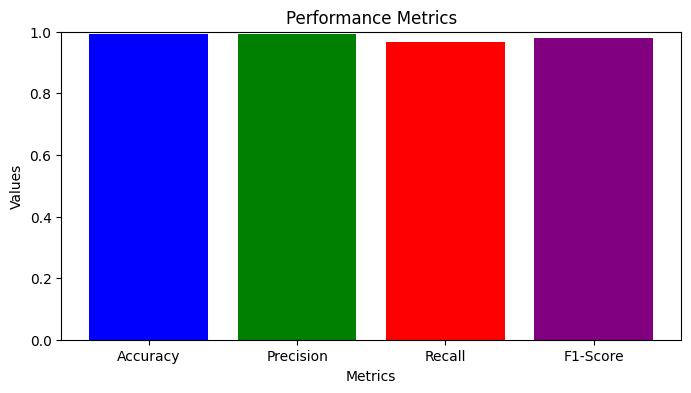

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'features' and 'labels' are defined
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape features for RNN input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(np.unique(labels)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluation metrics
accuracy = accuracy_score(Y_test, y_pred_classes)
precision = precision_score(Y_test, y_pred_classes, average='macro')
recall = recall_score(Y_test, y_pred_classes, average='macro')
f1 = f1_score(Y_test, y_pred_classes, average='macro')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Plotting metrics in a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


In [8]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f" Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9910714285714286
Precision: 0.9919377488890895
 Recall: 0.9680025226464855
F1-Score: 0.9792269148647822


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


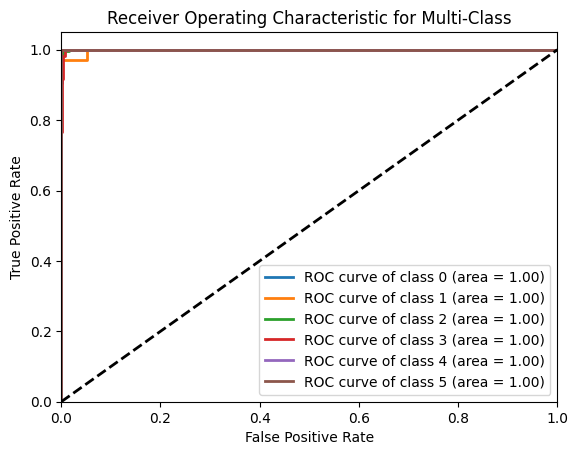

In [9]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Predict class probabilities
probabilities = model.predict(X_test)

# Binarize the labels for multi-class plot
Y_test_bin = label_binarize(Y_test, classes=np.unique(labels))
n_classes = Y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure()
lw = 2  # Line width
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
39/39 - 0s - 739us/step - accuracy: 0.9911 - loss: 0.0280
Test accuracy: 0.9910714030265808, Test loss: 0.02803376130759716


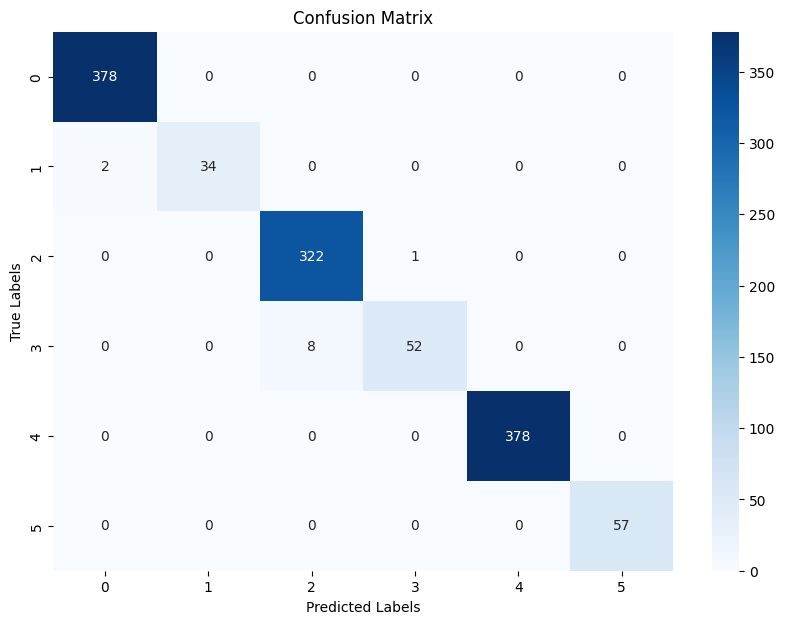

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming the rest of your model training and prediction code is here

# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluation metrics
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

# Generate and visualize confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, LSTM, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Adding a global pooling layer to reduce feature dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

# Prepare your data generators
data_gen = ImageDataGenerator(rescale=1./255)
generator = data_gen.flow_from_directory(
    '/Users/krishna/Semester2/GWAR/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for feature extraction: keeps data in order
)

# Extract features
features = model.predict(generator, steps=len(generator))
labels = generator.classes

# Apply PCA to reduce feature dimensions
pca = PCA(n_components=0.95)  # keep 95% of variance
features_reduced = pca.fit_transform(features)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features_reduced, labels, test_size=0.2, random_state=42)

# Reshape features for RNN input (batch, timesteps, features per step)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(50, input_shape=(1, X_train.shape[2])))  # Adjust the number of LSTM units as needed
rnn_model.add(Dense(10, activation='relu'))  # The number of neurons in the dense layer; adjust based on your dataset
rnn_model.add(Dense(len(np.unique(labels)), activation='softmax'))  # Output layer; number of classes

# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Evaluate the model
test_loss, test_acc = rnn_model.evaluate(X_test, Y_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Found 6160 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5931 - loss: 1.3117 - val_accuracy: 0.9302 - val_loss: 0.3142
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9490 - loss: 0.2172 - val_accuracy: 0.9838 - val_loss: 0.0924
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9915 - loss: 0.0610 - val_accuracy: 0.9886 - val_loss: 0.0480
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9975 - loss: 0.0249 - val_accuracy: 0.9894 - val_loss: 0.0352
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9984 - loss: 0.0136 - val_accuracy: 0.9903 - val_loss: 0.0318
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9991 - loss: 0.0083 - val_accuracy: 0.9894 - val_loss: 0.0298
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9989 - loss: 0.0055 - val_accuracy: 0.9894 - val_loss: 0.0303
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: